# NYPD Arrest Data analysis

In [1]:
### Introduce Dataset for the NYPD Arrest Data
### Import seaborn and matplotlib libraries
### Exported dataset from the website as CSV file and uploaded to Jupiter Notebook and displaying sample of data

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
df=pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20240503.csv')
df.head (5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [2]:
### Number of rows and columns
df.shape

(63621, 19)

In [3]:
df.describe

<bound method NDFrame.describe of        ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0       280255493  01/10/2024  397.0  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
1       279805419  01/02/2024  157.0                          RAPE 1  104.0   
2       279895750  01/03/2024  101.0                       ASSAULT 3  344.0   
3       280809090  01/19/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
4       280357135  01/11/2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
...           ...         ...    ...                             ...    ...   
63616   282877412  02/27/2024  339.0  LARCENY,PETIT FROM OPEN AREAS,  341.0   
63617   283628088  03/12/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
63618   283387006  03/07/2024  397.0  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
63619   283013910  03/01/2024  922.0  TRAFFIC,UNCLASSIFIED MISDEMEAN  348.0   
63620   283495531  03/10/2024  203.0            TRESPASS 3, CRIMINAL  352.0   

                 

In [60]:
### Replacing abbreviated data with complete description:

df['ARREST_BORO'].mask(df['ARREST_BORO']=="K", 'Brooklyn', inplace=True)
df['ARREST_BORO'].mask(df['ARREST_BORO']=="B", 'Bronx', inplace=True)
df['ARREST_BORO'].mask(df['ARREST_BORO']=="M", 'Manhattan', inplace=True)
df['ARREST_BORO'].mask(df['ARREST_BORO']=="S", 'Staten Island', inplace=True)
df['ARREST_BORO'].mask(df['ARREST_BORO']=="Q", 'Queens', inplace=True)
df['PERP_SEX'].mask(df['PERP_SEX']=="F", 'Female', inplace=True)
df['PERP_SEX'].mask(df['PERP_SEX']=="M", 'Male', inplace=True)
df['LAW_CAT_CD'].mask(df['LAW_CAT_CD']=="F", 'Felony', inplace=True)
df['LAW_CAT_CD'].mask(df['LAW_CAT_CD']=="V", 'Violation', inplace=True)
df['LAW_CAT_CD'].mask(df['LAW_CAT_CD']=="M", 'Misdemeanor', inplace=True)
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Manhattan,26,0,<18,Male,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Brooklyn,77,0,25-44,Male,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Queens,106,0,65+,Female,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Bronx,49,0,45-64,Male,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,Felony,Brooklyn,81,2,25-44,Female,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [61]:
### Defining columns:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [62]:
### Dropping columns that are not required for the analitics:
df_new = df[['ARREST_KEY', 'OFNS_DESC','LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']]
df_new.head(5)

,ARREST_KEY,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,280255493,ROBBERY,Felony,Manhattan,<18,Male,BLACK
1,279805419,RAPE,Felony,Brooklyn,25-44,Male,WHITE HISPANIC
2,279895750,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,Queens,65+,Female,WHITE
3,280809090,DANGEROUS DRUGS,Misdemeanor,Bronx,45-64,Male,BLACK
4,280357135,FELONY ASSAULT,Felony,Brooklyn,25-44,Female,BLACK


In [79]:
### RENAMING COLUMNS:
dfnew = df_new.rename(columns={'ARREST_KEY': 'Unique_Key', 'OFNS_DESC': 'Offence', 'LAW_CAT_CD': 'Category', 'ARREST_BORO': 'Borough', 
                               'AGE_GROUP': 'Age', 'PERP_SEX': 'Gender', 'PERP_RACE': 'Race'}) 
dfnew.head(3)

,Unique_Key,Offence,Category,Borough,Age,Gender,Race
0,280255493,ROBBERY,Felony,Manhattan,<18,Male,BLACK
1,279805419,RAPE,Felony,Brooklyn,25-44,Male,WHITE HISPANIC
2,279895750,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,Queens,65+,Female,WHITE


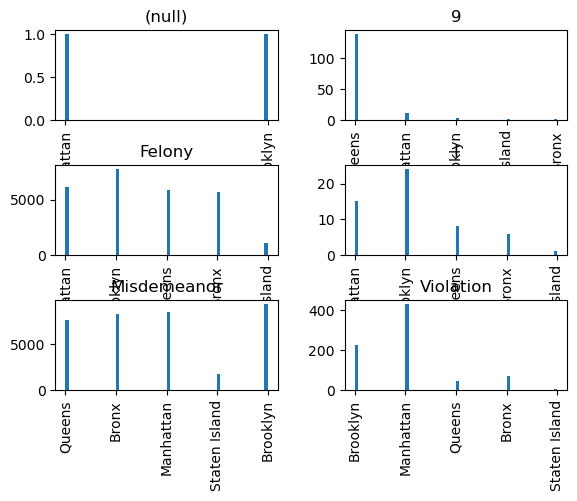

In [80]:
### ANALIZING DATA BY RACE AND BOROUGH
dfnew.hist(column='Borough', by='Category', bins=60)
plt.show()

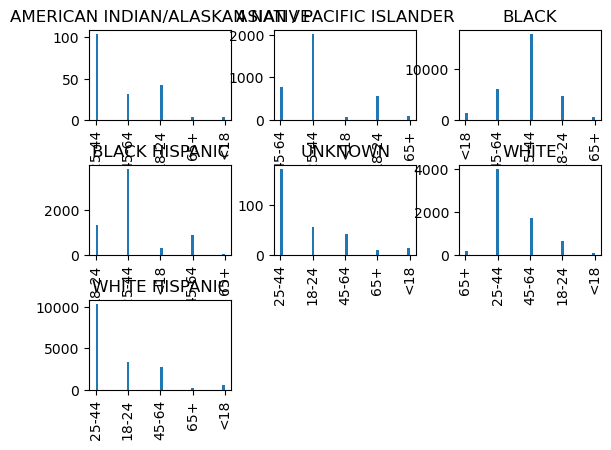

In [81]:
### ANALIZING DATA BY Offence and Age
dfnew.hist(column='Age', by='Race', bins=50)
plt.show()

In [82]:
# Dropping rows containing 9, I, null in Category column and "unknown" in race category:
dfnew.replace(['9', 'null', 'I', 'UNKNOWN'], pd.NA, inplace=True)
df_clean = dfnew.dropna()


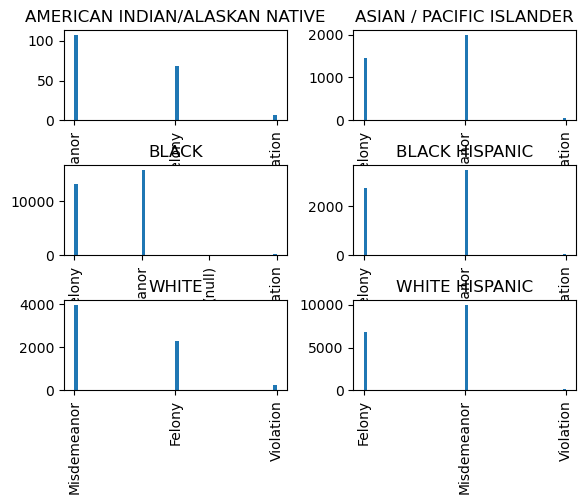

In [83]:
### ANALIZING DATA BY RACE AND BOROUGH with only the following 3 Categories:
### Felony, Misdemeanor and Violation
df_clean.hist(column='Category', by='Race', bins=60)
plt.show()

In [84]:
### Creating the list of total arrests by Borough
df_clean.groupby(['Borough'])['Unique_Key'].count()

Borough
Bronx            14027
Brooklyn         17263
Manhattan        15047
Queens           13535
Staten Island     2850
Name: Unique_Key, dtype: int64

<Axes: xlabel='Boroughs:'>

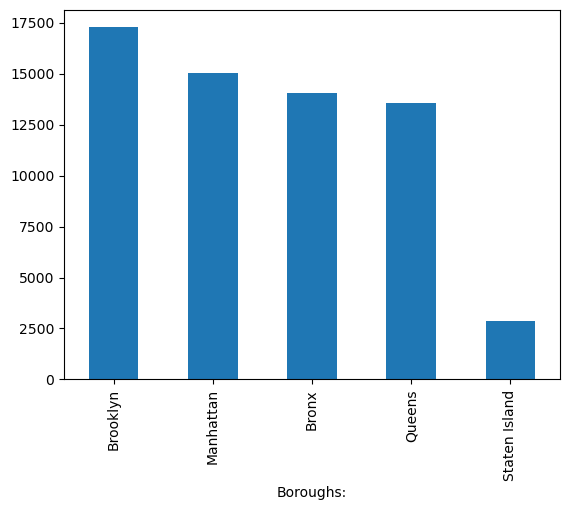

In [85]:
### Creating visualization of Overall arrests by Borough: 
### Brooklyn has the most arrests while Staten Island hs the least.

df_clean.groupby(['Borough'])['Category'].count().sort_values(ascending=False).plot(kind='bar', xlabel='Boroughs:')

<Axes: xlabel='Gender'>

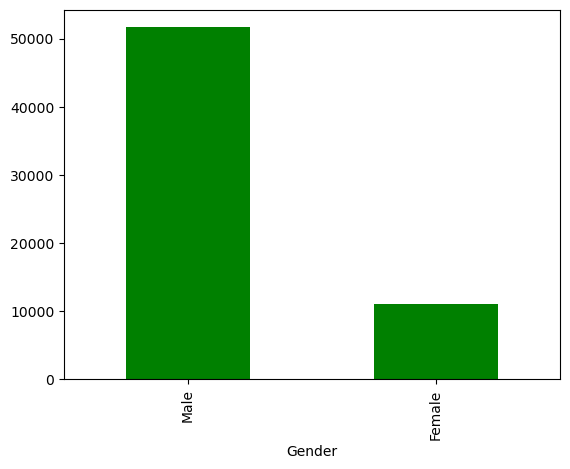

In [87]:
### Creating visualization of Overall arrests by Gender: Male arrests are by far higher then female ones.
df_clean.groupby(['Gender'])['Category'].count().sort_values(ascending=False).plot(kind='bar', color='green')

<Axes: xlabel='Age'>

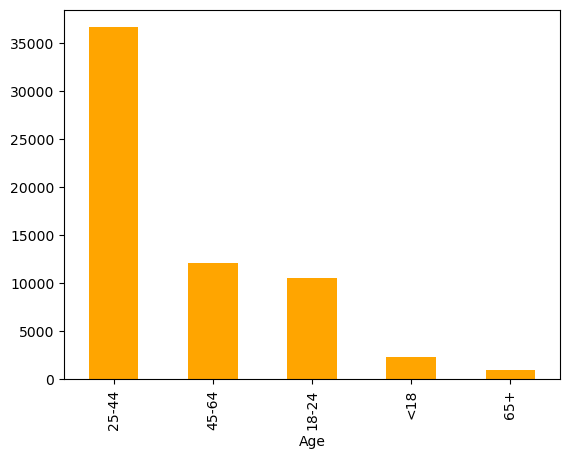

In [88]:
### Creating visualization of Overall arrests by Age: The Majority of all arrests are for age 25-44.
df_clean.groupby(['Age'])['Category'].count().sort_values(ascending=False).plot(kind='bar', color='orange')

<Axes: xlabel='Category'>

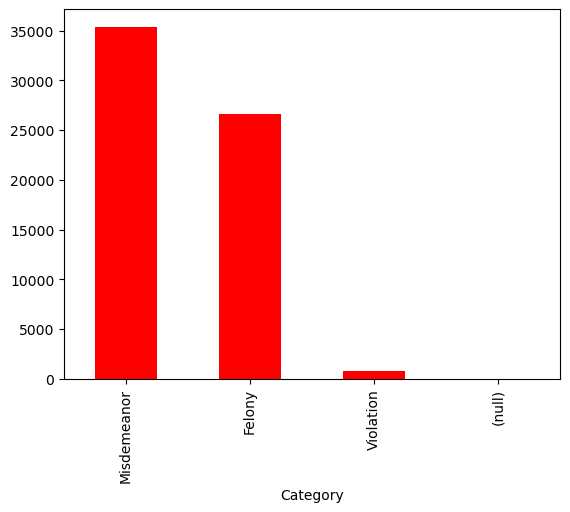

In [89]:
### Creating visualization of Overall arrests by Category: Most arrests are for Felony and Misdemeanor.
df_clean.groupby(['Category'])['Category'].count().sort_values(ascending=False).plot(kind='bar', color='red')

In [116]:
### Grouping by Category, Age, Race, Borough and Gender:

df_group = df_clean.groupby(['Category', 'Race', 'Age', 'Borough', 'Gender']).size().reset_index(name='Count')
df_group

,Category,Race,Age,Borough,Gender,Count
0,(null),BLACK,25-44,Brooklyn,Male,1
1,(null),BLACK,25-44,Manhattan,Male,1
2,Felony,AMERICAN INDIAN/ALASKAN NATIVE,18-24,Bronx,Female,1
3,Felony,AMERICAN INDIAN/ALASKAN NATIVE,18-24,Bronx,Male,1
4,Felony,AMERICAN INDIAN/ALASKAN NATIVE,18-24,Brooklyn,Female,2
...,...,...,...,...,...,...
600,Violation,WHITE HISPANIC,45-64,Bronx,Male,2
601,Violation,WHITE HISPANIC,45-64,Brooklyn,Male,10
602,Violation,WHITE HISPANIC,45-64,Manhattan,Female,1
603,Violation,WHITE HISPANIC,45-64,Manhattan,Male,6


<function matplotlib.pyplot.show(close=None, block=None)>

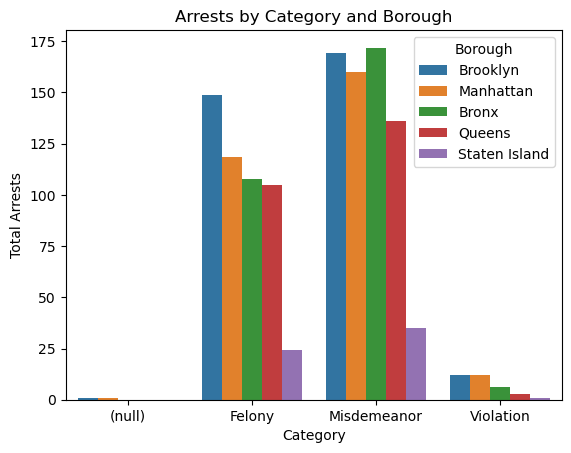

In [117]:
### Visualization by Category and Borough:

sns.barplot(x='Category', y='Count', hue='Borough', data=df_group, errorbar=None)
plt.title('Arrests by Category and Borough')
plt.xlabel('Category')
plt.ylabel('Total Arrests')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

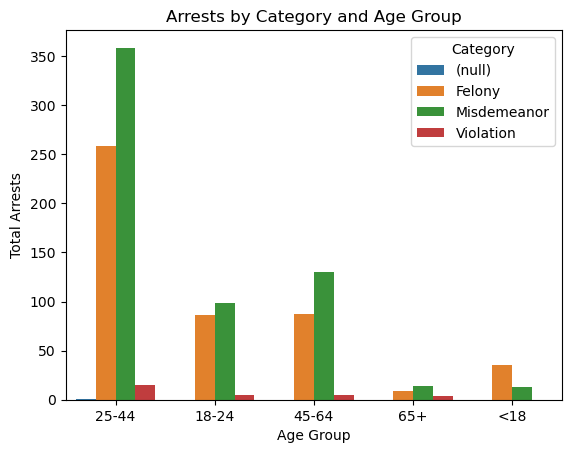

In [119]:
### Visualization by Category and Age Group:

sns.barplot(x='Age', y='Count', hue='Category', data=df_group, errorbar=None)
plt.title('Arrests by Category and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Arrests')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

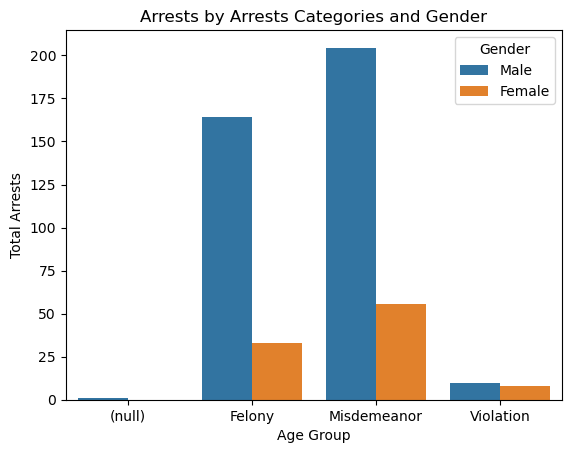

In [125]:
### Visualization by Categorty and Gender:

sns.barplot(x='Category', y='Count', hue='Gender', data=df_group, errorbar=None)
plt.title('Arrests by Arrests Categories and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Arrests')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

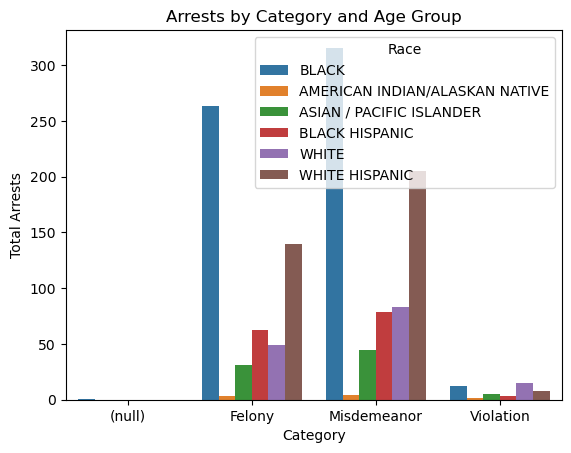

In [128]:
### Visualization by Category and Race:

sns.barplot(x='Category', y='Count', hue='Race', data=df_group, errorbar=None)
plt.title('Arrests by Category and Age Group')
plt.xlabel('Category')
plt.ylabel('Total Arrests')
plt.show

# Conclusion:

In [ ]:
### The data shows that majority of arrests are for males, age group 25-44, of the Black or White Hispanic race,
### Most arrests are for Misdemeanor or Felony with Brooklyn leadiing in th eoverall arrests numbers.